In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

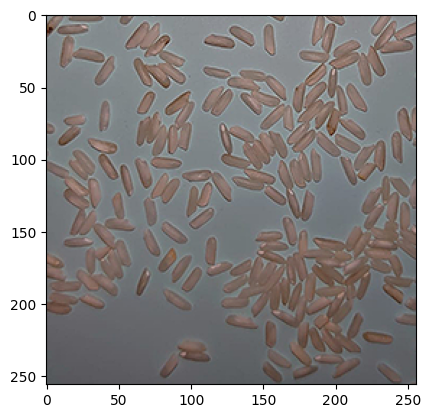

In [3]:
# Load the train image for review
img_path = image.load_img('./dataset/rice_images_bulog/step_1/full/1.png')

# show the image
plt.imshow(img_path)
plt.show()

In [4]:
# Create the train generator
train_dir = os.path.join('./dataset/rice_images_bulog/step_1/')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 89 images belonging to 3 classes.
Found 22 images belonging to 3 classes.


In [6]:
# check the batch size and the class
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(train_generator.batch_size)

{'full': 0, 'mixed_15': 1, 'mixed_25': 2}
{'full': 0, 'mixed_15': 1, 'mixed_25': 2}
8


In [7]:
# Get batch shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 256, 256, 3)
labels batch shape: (8, 3)


In [8]:
# Create the model with the best model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  
])

# Proses Training menggunakan Callback agar tidak Overfitting

In [9]:
# Compile the model with adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Terminate the training if the model is overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
# fit the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[early_stop]
)

Epoch 1/100


12/12 - 6s - loss: 15.6429 - accuracy: 0.3258 - val_loss: 15.1603 - val_accuracy: 0.3636 - 6s/epoch - 495ms/step
Epoch 2/100
12/12 - 2s - loss: 14.7880 - accuracy: 0.3146 - val_loss: 14.2980 - val_accuracy: 0.3636 - 2s/epoch - 196ms/step
Epoch 3/100
12/12 - 2s - loss: 13.9388 - accuracy: 0.4045 - val_loss: 13.4819 - val_accuracy: 0.3636 - 2s/epoch - 201ms/step
Epoch 4/100
12/12 - 2s - loss: 13.0997 - accuracy: 0.3820 - val_loss: 12.7109 - val_accuracy: 0.3636 - 2s/epoch - 197ms/step
Epoch 5/100
12/12 - 2s - loss: 12.3781 - accuracy: 0.3708 - val_loss: 11.9966 - val_accuracy: 0.3636 - 2s/epoch - 196ms/step
Epoch 6/100
12/12 - 2s - loss: 11.6824 - accuracy: 0.3820 - val_loss: 11.3324 - val_accuracy: 0.3636 - 2s/epoch - 197ms/step
Epoch 7/100
12/12 - 2s - loss: 11.0658 - accuracy: 0.3596 - val_loss: 10.7158 - val_accuracy: 0.4545 - 2s/epoch - 202ms/step
Epoch 8/100
12/12 - 2s - loss: 10.4284 - accuracy: 0.4719 - val_loss: 10.1487 - val_accuracy: 0.3636 - 2s/epoch - 202ms/ste

In [12]:
# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4

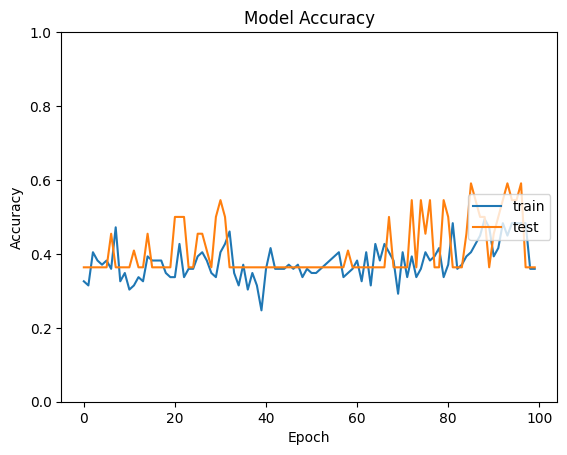

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.savefig('accuracy_2.png')
plt.show()

<Figure size 640x480 with 0 Axes>

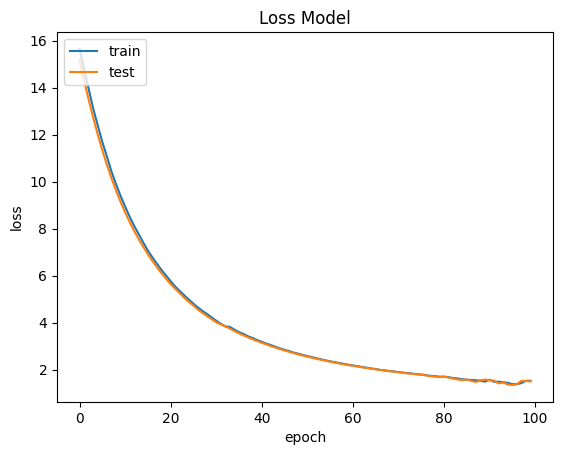

In [14]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_2.png')
plt.show()

In [15]:
# Save the model for stage 1
model.save('rice_pre2.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Proses Training Ke-2 untuk menambah akurasi

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Stop the training if the accuracy is more than 90%
        if(logs.get('accuracy') > 0.90):
            print("\nThe accuracy is reaching 90%! Terminating the training...\n")
            self.model.stop_training = True

In [17]:
callbacks = myCallback()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_callback = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[callbacks, early_stop]
)

Epoch 1/100
12/12 - 3s - loss: 1.5019 - accuracy: 0.3596 - val_loss: 1.4918 - val_accuracy: 0.3636 - 3s/epoch - 210ms/step
Epoch 2/100
12/12 - 2s - loss: 1.4815 - accuracy: 0.3596 - val_loss: 1.4805 - val_accuracy: 0.3636 - 2s/epoch - 198ms/step
Epoch 3/100
12/12 - 2s - loss: 1.4767 - accuracy: 0.3596 - val_loss: 1.4702 - val_accuracy: 0.3636 - 2s/epoch - 197ms/step
Epoch 4/100
12/12 - 2s - loss: 1.4650 - accuracy: 0.3596 - val_loss: 1.4601 - val_accuracy: 0.3636 - 2s/epoch - 201ms/step
Epoch 5/100
12/12 - 2s - loss: 1.4497 - accuracy: 0.3596 - val_loss: 1.4508 - val_accuracy: 0.3636 - 2s/epoch - 194ms/step
Epoch 6/100
12/12 - 2s - loss: 1.4445 - accuracy: 0.3596 - val_loss: 1.4424 - val_accuracy: 0.3636 - 2s/epoch - 190ms/step
Epoch 7/100
12/12 - 2s - loss: 1.4373 - accuracy: 0.3596 - val_loss: 1.4342 - val_accuracy: 0.3636 - 2s/epoch - 195ms/step
Epoch 8/100
12/12 - 2s - loss: 1.4304 - accuracy: 0.3596 - val_loss: 1.4257 - val_accuracy: 0.3636 - 2s/epoch - 195ms/step
Epoch 9/100
12/1

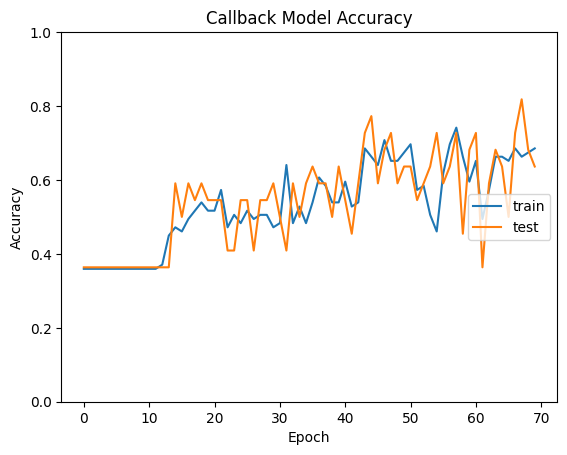

In [18]:
# Plot the callback accuracy
plt.plot(history_callback.history['accuracy'], label='accuracy')
plt.plot(history_callback.history['val_accuracy'], label = 'val_accuracy')
plt.title('Callback Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.savefig('accuracy_callback_2.png')
plt.show()

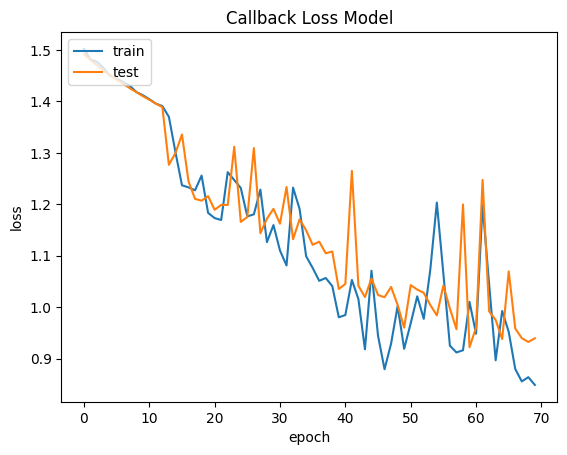

In [19]:
# Plot the callback loss
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('Callback Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_callback_2.png')
plt.show()

In [20]:
test_dir = os.path.join('./rice_images/test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical'
)

Found 42 images belonging to 3 classes.


In [21]:
# Make the prediction
predictions = model.predict(test_generator)
print(predictions)

3/3 [==============================] - 0s 96ms/step
[[0.20597845 0.7778388  0.01618273]
 [0.37954864 0.19053508 0.42991632]
 [0.45426178 0.42656252 0.11917574]
 [0.4311386  0.42671835 0.14214301]
 [0.3769967  0.11022532 0.512778  ]
 [0.39207512 0.10661767 0.50130725]
 [0.40653425 0.12783033 0.46563545]
 [0.37679195 0.09884837 0.52435964]
 [0.14288719 0.8465166  0.01059617]
 [0.19053681 0.7868058  0.0226574 ]
 [0.18006068 0.80217177 0.01776753]
 [0.08529029 0.912186   0.00252366]
 [0.50818944 0.3243648  0.1674458 ]
 [0.3767587  0.11235017 0.51089114]
 [0.4770215  0.33560514 0.1873734 ]
 [0.4000742  0.13736877 0.46255693]
 [0.53033525 0.29793823 0.17172655]
 [0.37661368 0.0927918  0.5305946 ]
 [0.42803812 0.13373305 0.4382288 ]
 [0.3787819  0.13273999 0.48847803]
 [0.3769025  0.12354708 0.49955046]
 [0.3733263  0.0834284  0.54324526]
 [0.17724735 0.8036902  0.01906245]
 [0.40809014 0.18981373 0.40209615]
 [0.38975433 0.10212538 0.50812024]
 [0.3939531  0.12023727 0.48580962]
 [0.493466  

In [22]:
# Evaluate the model
print("Model Evaluation:")
model.evaluate(test_generator)

Model Evaluation:
3/3 [==============================] - 0s 63ms/step - loss: 1.7651 - accuracy: 0.3333


[1.765066385269165, 0.3333333432674408]

# Hasil Pembuatan Model :

In [23]:
# Make the Result of Model Prediction
result = np.argmax(predictions, axis=1)
print('Result : ')
print(result)

Result : 
[1 2 0 0 2 2 2 2 1 1 1 1 0 2 0 2 0 2 2 2 2 2 1 0 2 2 0 2 0 1 1 0 0 0 0 0 1
 2 0 1 2 2]


In [24]:
# Review the result
print('Review the result : ')
for i in range(0, len(result)):
    if result[i] == 0:
        print('The image is Premium Rice with 5% broken rice')
    elif result[i] == 1:
        print('The image is Premium Rice with 15% broken rice')
    else:
        print('The image is Broken Rice with 25% broken rice')


Review the result : 
The image is Premium Rice with 15% broken rice
The image is Broken Rice with 25% broken rice
The image is Premium Rice with 5% broken rice
The image is Premium Rice with 5% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The image is Premium Rice with 15% broken rice
The image is Premium Rice with 15% broken rice
The image is Premium Rice with 15% broken rice
The image is Premium Rice with 15% broken rice
The image is Premium Rice with 5% broken rice
The image is Broken Rice with 25% broken rice
The image is Premium Rice with 5% broken rice
The image is Broken Rice with 25% broken rice
The image is Premium Rice with 5% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The image is Broken Rice with 25% broken rice
The imag

In [25]:
# Show the Accuracy
print('The accuracy is : ')
print(history_callback.history['accuracy'][-1] * 100)

The accuracy is : 
68.53932738304138


In [26]:
# Save the model
model.save('final_model_rice.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
